In [8]:
#Important package for NLP
! pip install nltk
! pip install -U spacy
! pip install textblob
! pip install scikit-learn



# for data manupulation, cleansing and plotting
! pip install pandas
! pip install matplotlib
! pip install numpy


! pip list  #check installed packages
# ! pip freeze > requirements.txt #save installed packages to requirements.txt

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
  Using cached spacy-3.2.1-cp39-cp39-win_amd64.whl (11.8 MB)
  Using cached langcodes-3.3.0-py3-none-any.whl (181 kB)
  Using cached pathy-0.6.1-py3-none-any.whl (42 kB)
  Using cached catalogue-2.0.6-py3-none-any.whl (17 kB)
  Using cached pydantic-1.8.2-cp39-cp39-win_amd64.whl (1.9 MB)
  Using cached thinc-8.0.13-cp39-cp39-win_amd64.whl (1.0 MB)
  Using cached spacy_legacy-3.0.8-py2.py3-none-any.whl (14 kB)
  Using cached typer-0.4.0-py3-none-any.whl (27 kB)
  Using cached spacy_loggers-1.0.1-py3-none-any.whl (7.0 kB)
  Using cached srsly-2.4.2-cp39-cp39-win_amd64.whl (451 kB)
  Using cached smart_open-5.2.1-py3-none-any.whl (58 kB)
Defaulting to user installation because normal site-packages is not writeable
  Using cached textblob-0.17.1-py2.py3-none-any.whl (636 kB)
Defaulting to user installation because normal site-packages i

Error processing line 1 of C:\Users\074be\AppData\Roaming\Python\Python39\site-packages\matplotlib-3.5.1-py3.9-nspkg.pth:

  Traceback (most recent call last):
    File "E:\program\Anaconda\envs\DatarushGpu\lib\site.py", line 169, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
    File "<frozen importlib._bootstrap>", line 562, in module_from_spec
  AttributeError: 'NoneType' object has no attribute 'loader'

Remainder of file ignored


Defaulting to user installation because normal site-packages is not writeable
  Using cached matplotlib-3.5.1-cp39-cp39-win_amd64.whl (7.2 MB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached kiwisolver-1.3.2-cp39-cp39-win_amd64.whl (52 kB)
  Using cached Pillow-9.0.0-cp39-cp39-win_amd64.whl (3.2 MB)
  Using cached fonttools-4.28.5-py3-none-any.whl (890 kB)


In [7]:
import re

import pandas as pd
import numpy as np

import nltk #natural language toolkit

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score

import matplotlib.pyplot as plt


# !python -m spacy download en


import spacy
from nltk.stem import PorterStemmer

nlp = spacy.load('en_core_web_sm')

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
# Reading the training and testing dataset
df_data = pd.read_csv('./data/train.csv')
# df_test_orginal = pd.read_csv('./data/test.csv')

# df_train= df_train_orginal.sample(n=1000) #sampling  the data to make it faster
# df_test= df_test_orginal.sample(n=1000)#sampling only 1000 rows randomly

# df_data= df_train_orginal.sample(n=10000) #sampling 10000 from 3 lakh data  the data to make it faster
df_data.head()

,id,abstract,category,category_num
0,271675,Bacteria are often exposed to multiple stimu...,q-bio-QM,138
1,412276,Accurate knowledge of the thermodynamic prop...,hep-ph-,68
2,256956,The largest X9.3 solar flare in solar cycle ...,astro-ph-SR,7
3,427612,We say that a random integer variable $X$ is...,math-PR,93
4,113852,We derive a formula expressing the joint dis...,math-CO,76


In [ ]:
# # Distribution of data among the category
# import pandas as pd
# pd.options.plotting.backend = "plotly"

# fig=df_train_orginal['category'].value_counts().plot(kind='bar')
# fig.show()

In [ ]:
# df_train['category'].value_counts()

In [ ]:
# ps = PorterStemmer()
# lem= WordNetLemmatizer()

In [ ]:
# def clean_abstract(text):
#   text = re.sub('[^a-z\s]', ' ', text.lower())
#   text = [i.lower() for i in text.split() if i not in nlp.Defaults.stop_words]
#   text = [ps.stem(i) for i in text]
#   text = ' '.join(text)
#   text.replace('\n',' ')
#   return text

In [ ]:
# df_train['abstract'] = df_train['abstract'].apply(clean_abstract)
# df_test['abstract'] = df_test['abstract'].apply(clean_abstract)

# df_train.head()

In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer
# from nltk.tokenize import RegexpTokenizer

# #tokenizer to remove unwanted elements from out data like symbols and numbers
# token = RegexpTokenizer(r'[a-zA-Z0-9]+')
# cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
# text_counts= cv.fit_transform(df_data['abstract'])
# text_counts.shape


In [ ]:
# from sklearn.feature_extraction.text import TfidfTransformer
# tfidf_transformer = TfidfTransformer()
# text_counts_tfidf = tfidf_transformer.fit_transform(text_counts)
# text_counts_tfidf.shape

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(
#     text_counts_tfidf, df_data['category_num'], test_size=0.3, random_state=1)


In [ ]:
# from sklearn.naive_bayes import MultinomialNB
# #Import scikit-learn metrics module for accuracy calculation
# from sklearn import metrics
# # Model Generation Using Multinomial Naive Bayes
# clf = MultinomialNB().fit(X_train, y_train)
# predicted= clf.predict(X_test)
# print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

In [ ]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

df_data['category'].value_counts().sort_values(ascending=False).iplot(kind='bar', yTitle='no. belonging to category ', title='Category Distribution')

In [ ]:

import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords

df_data = df_data.reset_index(drop=True)
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
df_data['abstract'] = df_data['abstract'].apply(clean_text)
df_data['abstract'] = df_data['abstract'].str.replace('\d+', '')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\074be\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df_data.head()


,id,abstract,category,category_num
0,271675,bacteria often eposed multiple stimuli comple ...,q-bio-QM,138
1,412276,accurate knowledge thermodynamic properties ze...,hep-ph-,68
2,256956,largest solar flare solar cycle preceding f...,astro-ph-SR,7
3,427612,say random integer variable monotone modulus t...,math-PR,93
4,113852,derive formula epressing joint distribution cy...,math-CO,76


In [ ]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS =50000
# Max number of words in each abstract
MAX_SEQUENCE_LENGTH = 300
# This is fixed.
EMBEDDING_DIM = 100

from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df_data['abstract'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))



Found 1848896 unique tokens.


In [ ]:
from keras.preprocessing.sequence import pad_sequences

X = tokenizer.texts_to_sequences(df_data['abstract'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (390603, 300)


In [ ]:

Y = pd.get_dummies(df_data['category']).values
print('Shape of label tensor:', Y.shape)


Shape of label tensor: (390603, 156)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(351542, 300) (351542, 156)
(39061, 300) (39061, 156)


In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(len(Y[1]), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
epochs = 20
batch_size =1024

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 100)          5000000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 300, 100)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 156)               15756     
                                                                 
Total params: 5,096,156
Trainable params: 5,096,156
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
  2/309 [..............................] - ETA: 30:33 - loss: 5.0489 - accuracy: 0.0093

KeyboardInterrupt: 

In [ ]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

32/32 [==============================] - 2s 76ms/step - loss: 3.0371 - accuracy: 0.2860
Test set
  Loss: 3.037
  Accuracy: 0.286


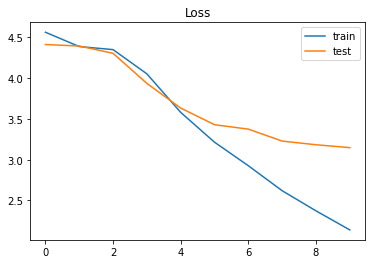

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

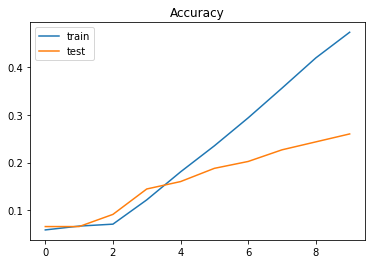

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [ ]:
column_names = ['id','category_num']

df_solution = pd.DataFrame(columns = column_names)
df_solution

,Id,Category_num


In [ ]:
df_test=pd.read_csv('./data/test.csv')
# df_test

## copy 'id' column of test.csv to "Id" column of df_solution
df_solution.Id=df_test.id   # or use below method
# df_solution["Id"]=df_test["id"].values
df_test.loc[42630]

# df_solution

id                                                     110188
abstract      We establish a theoretical link between adve...
Name: 42630, dtype: object

In [ ]:
for index, row in df_test.iterrows():
    new_abstract = [row['abstract']]
    seq = tokenizer.texts_to_sequences(new_abstract)
    padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
    pred = model.predict(padded)
    print ('Currently processing Index no.:  ', index)
    df_solution.loc[index,'Category_num'] = pred.argmax()
    

    




# def predict_category(text):
#     new_abstract = [text]
#     seq = tokenizer.texts_to_sequences(new_abstract)
#     padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
#     pred = model.predict(padded)
#     print(pred.argmax())
#     return pred.argmax()


# def apply_predict_category(x): return predict_category(x['abstract'])

# df_solution['Category_num'] = df_test.apply(apply_predict_category, axis=1)

  
    

    

Currently processing Index no.:   0
Currently processing Index no.:   1
Currently processing Index no.:   2
Currently processing Index no.:   3
Currently processing Index no.:   4
Currently processing Index no.:   5
Currently processing Index no.:   6
Currently processing Index no.:   7
Currently processing Index no.:   8
Currently processing Index no.:   9
Currently processing Index no.:   10
Currently processing Index no.:   11
Currently processing Index no.:   12
Currently processing Index no.:   13
Currently processing Index no.:   14
Currently processing Index no.:   15
Currently processing Index no.:   16
Currently processing Index no.:   17
Currently processing Index no.:   18
Currently processing Index no.:   19
Currently processing Index no.:   20
Currently processing Index no.:   21
Currently processing Index no.:   22
Currently processing Index no.:   23
Currently processing Index no.:   24
Currently processing Index no.:   25
Currently processing Index no.:   26
Currently p

In [ ]:
df_solution.to_csv('solution.csv',index=False)

In [ ]:
####  Test manually
new_abstract = [" We study the in-gap states that appear at the boundaries of both 1D and 2D topological superconductors. While the massless Majorana quasiparticles are guaranteed to arise by the bulk-edge correspondence, we find that they could be accompanied by massive Volkov-Pankratov (VP) states which are present only when the interface is sufficiently smooth. These predictions can be tested in an s-wave superconductor with Rashba spin-orbit coupling placed on top of a magnetic domain wall. We calculate the spin-resolved local density of states of the VP states about the band inversion generated by a magnetic domain wall and find that they are oppositely spin-polarized on either side of the topological phase boundary. We also demonstrate that the spatial position, energy-level spacing, and spin polarization of the VP states can be modified by the introduction of in-plane electric fields. "]



seq = tokenizer.texts_to_sequences(new_abstract)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
print(np.argmax(pred))

7
